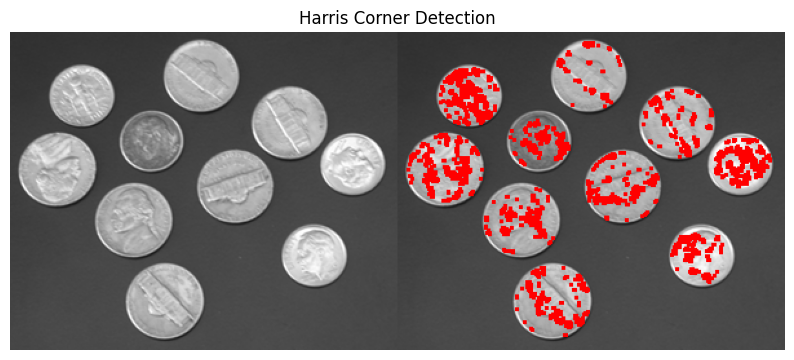

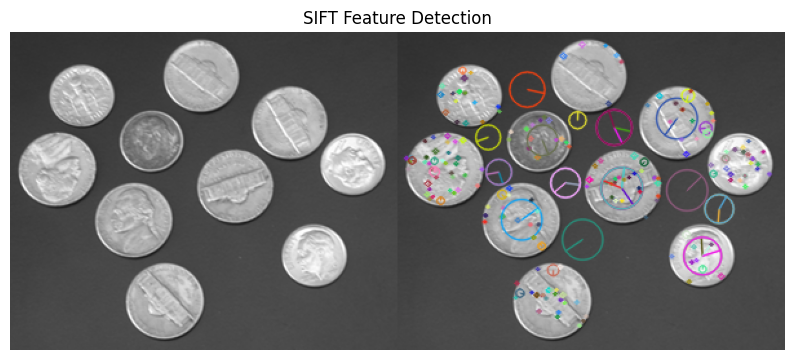

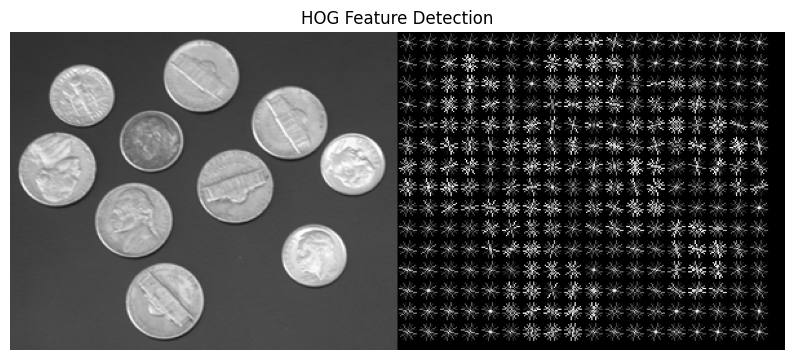

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

# Helper function to display BGR image with matplotlib
def show_bgr(img, title="Image"):
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load your image (change the path as per your system)
image_path = "C:\\Users\\HP\\Downloads\\Standard Images\\coins.png"

### ------------------ Harris Corner Detection ------------------
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_float = np.float32(gray)

dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

image_with_corners = image.copy()
image_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]

side_by_side = np.hstack((image, image_with_corners))
show_bgr(side_by_side, "Harris Corner Detection")

### ------------------ SIFT (Scale-Invariant Feature Transform) ------------------
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints directly (output is already BGR)
output = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# No need to convert to BGR since output is already in color
side_by_side = np.hstack((image, output))
show_bgr(side_by_side, "SIFT Feature Detection")

### ------------------ HOG (Histogram of Oriented Gradients) ------------------
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

features, hog_image = hog(
    gray, 
    pixels_per_cell=(16, 16), 
    cells_per_block=(2, 2),
    orientations=8, 
    visualize=True, 
    block_norm='L2-Hys'
)

hog_image = np.uint8(255 * hog_image)
hog_image_colored = cv2.cvtColor(hog_image, cv2.COLOR_GRAY2BGR)
hog_image_colored = cv2.resize(hog_image_colored, (image.shape[1], image.shape[0]))

side_by_side = np.hstack((image, hog_image_colored))
show_bgr(side_by_side, "HOG Feature Detection")
